In [3]:
import os

import matplotlib.pyplot as plt

# import seaborn as sns
import numpy as np
from sklearn.manifold import TSNE
import pandas as pd


In [4]:
os.getcwd()

'/home/mariia.sidulova/scdn/DomId/notebooks'

In [5]:
def load_files(path):
    df = pd.read_csv(path+'clustering_results.csv')
    
    domain = df['predictions'].values
    
    vec_d = df['vec_d_labels'].values
    vec_y = df['vec_y_labels'].values
    img_locs = df['image_id_labels'].values

    Z = np.load(path + "Z_space.npy")
    model_name = path.split('_')[-1]

    #args = np.loadtxt(path + "arguments.txt", dtype=str, usecols=0)  # , delimiter = '\n')
    #img_locs = np.loadtxt(path + "img_id.txt", dtype=str)
    
    return domain, vec_d, vec_y, img_locs, model_name

In [44]:

ex = '2023-04-05 09:29:44.598644/'
ex = '2023-05-02 21:19:38.468548_mnistcolor10_vade/'
ex ='2023-05-02 21:37:22.120892_mnistcolor10_vade/'
#ex ='2023-05-02 21:55:09.053823_mnistcolor10_dec/'

ex = '2023-05-05 13:36:08.430085_mnistcolor10_vade/'
ex ='2023-05-05 13:42:10.843056_mnistcolor10_vade/'
ex = '2023-05-05 13:47:18.679212_mnistcolor10_dec/'
# '

ex = '2023-05-09 10:48:56.500472_mnistcolor10_vade/'
ex = '2023-05-09 10:53:08.214049_mnistcolor10_vade/'
ex = '2023-05-09 10:57:42.059288_mnistcolor10_dec/'

ex = '2023-05-09 11:17:46.609664_mnistcolor10_vade/'
ex = '2023-05-09 11:43:05.893566_mnistcolor10_vade/'
ex = '2023-05-09 12:08:27.291846_mnistcolor10_dec/'

ex = '2023-07-25 11:34:03.086461_mnistcolor10_sdcn/'
ex = '2023-07-25 11:47:57.588004_mnistcolor10_sdcn/'
ex = '2023-07-25 13:39:23.496668_mnistcolor10_sdcn/'

ex = '2023-07-26 09:42:16.735969_mnistcolor10_sdcn/'
ex = '2023-07-26 09:55:20.695474_mnistcolor10_sdcn/'
#ex = '2023-07-25 14:11:33.101350_mnistcolor10_sdcn/'

ex = '2023-08-01 14:25:26.204959_mnist_sdcn/'
ex = '2023-08-01 14:55:54.792810_mnist_sdcn/'

In [45]:
domain, vec_d, vec_y, img_locs, model_name = load_files(ex)
color = vec_d
digit = vec_y
model_name = ex.split('_')[-1][:-1]

In [46]:
def something_per_domain(domain, another_label):
    """
    domain - predicted domain labels 
    another_label - some other label that corresponds to each of the predicted domain (
    assumed that both domain and something have the same img_loc reference order 
    """
    u_something = np.unique(another_label)
    u_domain = np.unique(domain)
    print('unique predicted domain', u_domain)
    print('unique true label', u_something)
    
    array_counters=[]
    for i in u_domain:
        for j in u_something:
            counter = 0
            for idx in range(0, len(domain)):
                if domain[idx]==i and another_label[idx]==j:
                    counter+=1
            print('domain ', i, ' digit ', j, ' count', counter)
            array_counters.append(counter)
    return array_counters
                    
        
    

In [47]:
digits_per_domain = something_per_domain(domain, digit)

unique predicted domain [ 1  2  3  4  5  6  7  8  9 10]
unique true label [0 1 2 3 4 5 6 7 8 9]
domain  1  digit  0  count 16
domain  1  digit  1  count 22
domain  1  digit  2  count 22
domain  1  digit  3  count 22
domain  1  digit  4  count 21
domain  1  digit  5  count 29
domain  1  digit  6  count 17
domain  1  digit  7  count 16
domain  1  digit  8  count 23
domain  1  digit  9  count 20
domain  2  digit  0  count 111
domain  2  digit  1  count 130
domain  2  digit  2  count 112
domain  2  digit  3  count 116
domain  2  digit  4  count 115
domain  2  digit  5  count 125
domain  2  digit  6  count 124
domain  2  digit  7  count 115
domain  2  digit  8  count 110
domain  2  digit  9  count 103
domain  3  digit  0  count 28
domain  3  digit  1  count 19
domain  3  digit  2  count 12
domain  3  digit  3  count 27
domain  3  digit  4  count 32
domain  3  digit  5  count 21
domain  3  digit  6  count 18
domain  3  digit  7  count 21
domain  3  digit  8  count 18
domain  3  digit  9  cou

In [48]:
digits_per_domain

[16,
 22,
 22,
 22,
 21,
 29,
 17,
 16,
 23,
 20,
 111,
 130,
 112,
 116,
 115,
 125,
 124,
 115,
 110,
 103,
 28,
 19,
 12,
 27,
 32,
 21,
 18,
 21,
 18,
 21,
 8,
 8,
 11,
 9,
 8,
 12,
 12,
 8,
 7,
 7,
 48,
 56,
 49,
 64,
 58,
 41,
 56,
 74,
 73,
 60,
 63,
 70,
 58,
 65,
 82,
 63,
 65,
 75,
 69,
 69,
 91,
 101,
 89,
 98,
 84,
 99,
 101,
 93,
 91,
 85,
 43,
 63,
 50,
 55,
 47,
 39,
 48,
 51,
 47,
 61,
 6,
 4,
 4,
 6,
 4,
 7,
 7,
 7,
 3,
 7,
 56,
 61,
 54,
 51,
 51,
 55,
 69,
 59,
 65,
 54]

In [49]:
colors_per_domain = something_per_domain(domain, color)

unique predicted domain [ 1  2  3  4  5  6  7  8  9 10]
unique true label [0 1 2 3 4 5 6 7 8 9]
domain  1  digit  0  count 0
domain  1  digit  1  count 0
domain  1  digit  2  count 11
domain  1  digit  3  count 0
domain  1  digit  4  count 22
domain  1  digit  5  count 0
domain  1  digit  6  count 175
domain  1  digit  7  count 0
domain  1  digit  8  count 0
domain  1  digit  9  count 0
domain  2  digit  0  count 0
domain  2  digit  1  count 482
domain  2  digit  2  count 4
domain  2  digit  3  count 442
domain  2  digit  4  count 0
domain  2  digit  5  count 0
domain  2  digit  6  count 0
domain  2  digit  7  count 0
domain  2  digit  8  count 214
domain  2  digit  9  count 19
domain  3  digit  0  count 0
domain  3  digit  1  count 18
domain  3  digit  2  count 0
domain  3  digit  3  count 0
domain  3  digit  4  count 0
domain  3  digit  5  count 0
domain  3  digit  6  count 0
domain  3  digit  7  count 53
domain  3  digit  8  count 51
domain  3  digit  9  count 95
domain  4  digit  0

In [50]:
colors_per_domain

[0,
 0,
 11,
 0,
 22,
 0,
 175,
 0,
 0,
 0,
 0,
 482,
 4,
 442,
 0,
 0,
 0,
 0,
 214,
 19,
 0,
 18,
 0,
 0,
 0,
 0,
 0,
 53,
 51,
 95,
 0,
 0,
 0,
 12,
 0,
 0,
 0,
 33,
 21,
 24,
 2,
 0,
 191,
 17,
 1,
 41,
 258,
 0,
 39,
 30,
 0,
 0,
 0,
 3,
 373,
 0,
 0,
 0,
 126,
 177,
 459,
 0,
 278,
 23,
 73,
 3,
 58,
 0,
 0,
 38,
 29,
 0,
 0,
 0,
 0,
 455,
 0,
 0,
 4,
 16,
 10,
 0,
 16,
 3,
 0,
 1,
 9,
 0,
 6,
 10,
 0,
 0,
 0,
 0,
 31,
 0,
 0,
 414,
 39,
 91]

In [51]:
len(digits_per_domain)

100

In [52]:



def plot_something_per_domain_counts(domain, another_label, counts, fs, legend = False, thres = None,  title = None,digit_plot=True):
    """
    domain - predicted domain labels
    another_label - another label aassociated with each predicted domain (should be same shape as domain)
    counts - countes of each another label in each of the predicted domain (see something_per_domain function)
    fs - font size
    colors - colors of each segment on the bargraph
    legend - legend of unique another lables
    thres - if thresholding of another label is required then should be shpecifies (also see apply_threshold function)
    
    """
    u_domains = np.unique(domain)
    N = len(u_domains)
    
    u_another_label = np.unique(another_label)
    print('unique labels', u_another_label, ' N ', N)
    counts = np.array(counts)
    narray = np.array_split(counts, N)

#     if thres:
#         u_another_label_dic = apply_threshold(u_another_label, narray, thres, N)
#         #print(u_another_label_dic.values())
#         u_another_label = list(u_another_label_dic.keys())
#         narray = list(u_another_label_dic.values())
#         narray = np.transpose(narray)

   # print(narray)
    #print(len(u_domains), len(u_another_label))
    if digit_plot:
        c =  ['darkseagreen', 'forestgreen', 'aquamarine', 'lightseagreen', 'teal', 'steelblue','lightblue', 'royalblue','navy', 'lightslategrey' ]

    else:
        c = ['mediumpurple', 'darkmagenta','orchid', 'lightpink', 'lightcoral', 'maroon', 'sandybrown', 'peachpuff', 'goldenrod', 'gold']
    plt.figure(figsize=(5,5))
    for i in range(0, len(u_domains)):
        for jj in range(0,len(u_another_label)):
            
            if jj>0:
                bottom = np.sum(narray[i][:jj])
            else:
                bottom = 0
            #print(i, narray[i][jj])
            plt.bar(i, narray[i][jj], bottom = bottom, color = c[jj])
    x = np.linspace(0, N-1, N)
    x_ticks = u_domains
    plt.ylabel("Counts", fontsize=fs)
    plt.xticks(x, x_ticks, fontsize=fs)
    plt.yticks(fontsize=fs)
    plt.xlabel("Domain", fontsize=fs)
    plt.title(title, fontsize = fs, weight = 'bold')
   
    if legend:
        plt.legend(legend)
    else:
        plt.legend(u_another_label)
    plt.show()

In [53]:
def plot_something_per_domain_proportion(domain, another_label, counts, fs, legend = False, thres = None, title = None, digit_plot = True):
    """
    domain - predicted domain labels
    another_label - another label aassociated with each predicted domain (should be same shape as domain)
    counts - countes of each another label in each of the predicted domain (see something_per_domain function)
    fs - font size
    colors - colors of each segment on the bargraph
    legend - legend of unique another lables
    thres - if thresholding of another label is required then should be shpecifies (also see apply_threshold function)
    
    """
    u_domains = np.unique(domain)
    N = len(u_domains)
    
    u_another_label = np.unique(another_label)
    print('unique labels', u_another_label)
    print(u_domains)
    counts = np.array(counts)
    narray = np.array_split(counts, N)

    if thres:
        u_another_label_dic = apply_threshold(u_another_label, narray, thres, N)
        #print(u_another_label_dic.values())
        u_another_label = list(u_another_label_dic.keys())
        narray = list(u_another_label_dic.values())
        narray = np.transpose(narray)

   # print(narray)
    #print(len(u_domains), len(u_another_label))
    # c = ['blue', 'teal', 'pink', 'orange', 'green', 'red', 'plum', 'grey', 'purple', 'yellow']
    # c = ['lightblue', 'steelblue', 'royalblue', 'mediumpurple', 'darkmagenta','orchid', 'lightpink', 'lightcoral', 'maroon', 'sandybrown']
    
    if digit_plot:
        c =  ['darkseagreen', 'forestgreen', 'aquamarine', 'lightseagreen', 'teal', 'steelblue','lightblue', 'royalblue','navy', 'lightslategrey' ]

    else:
        c = ['mediumpurple', 'darkmagenta','orchid', 'lightpink', 'lightcoral', 'maroon', 'sandybrown', 'peachpuff', 'goldenrod', 'gold']
  
        
    plt.figure(figsize = (5, 5))
    for i in range(0, len(u_domains)):
        for jj in range(0,len(u_another_label)):
            
            if jj>0:
                bottom = np.sum(narray[i][:jj])/np.sum(narray[i])
            else:
                bottom = 0
            ##print(i, narray[i][jj])
            #print(c[jj])
            plt.bar(i, narray[i][jj]/np.sum(narray[i]), bottom = bottom, color = c[jj])
    x = np.linspace(0, N-1, N)
    x_ticks = [str(item)[0] for item in u_domains]
    #plt.ylabel("Proportion", fontsize=fs)
    plt.xticks(x, x_ticks, fontsize=fs)
    plt.yticks(fontsize=fs)
    plt.xlabel("Domain", fontsize=fs)
    plt.title(title, fontsize = fs, weight = 'bold')
    plt.tick_params(left = False, labelleft = False)
    if legend:
        plt.legend(legend, bbox_to_anchor=(0.5, 10))
    else:
        plt.legend(u_another_label, bbox_to_anchor=(1, 1.1), fancybox=True, shadow=True, fontsize = fs)
    plt.show()

unique labels [0 1 2 3 4 5 6 7 8 9]
[ 1  2  3  4  5  6  7  8  9 10]


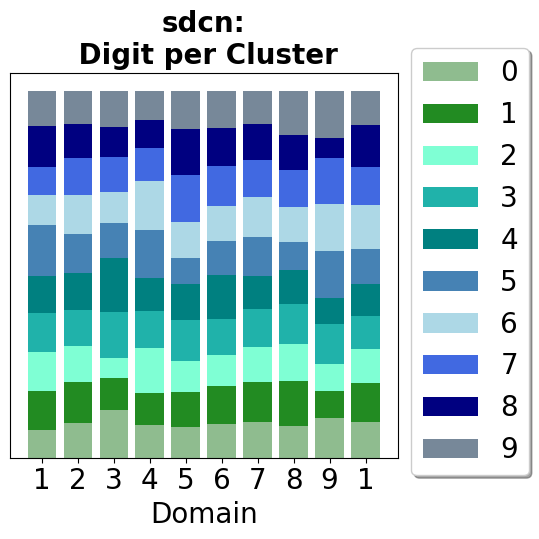

In [54]:
plot_something_per_domain_proportion(domain, digit, digits_per_domain, fs =20,title = model_name+':\n Digit per Cluster')

unique labels [0 1 2 3 4 5 6 7 8 9]
[ 1  2  3  4  5  6  7  8  9 10]


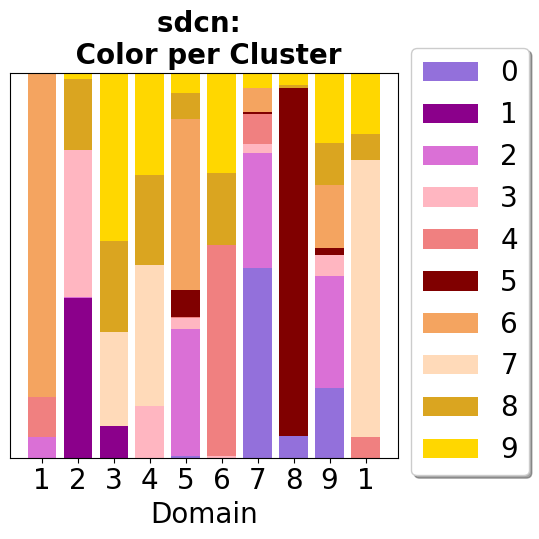

In [55]:
#plot_something_per_domain_counts(domain, color, colors_per_domain, fs =10) 
plot_something_per_domain_proportion(domain, color, colors_per_domain, fs =20, title = model_name+': \n Color per Cluster', digit_plot = False ) 

unique labels [0 1 2 3 4 5 6 7 8 9]  N  10


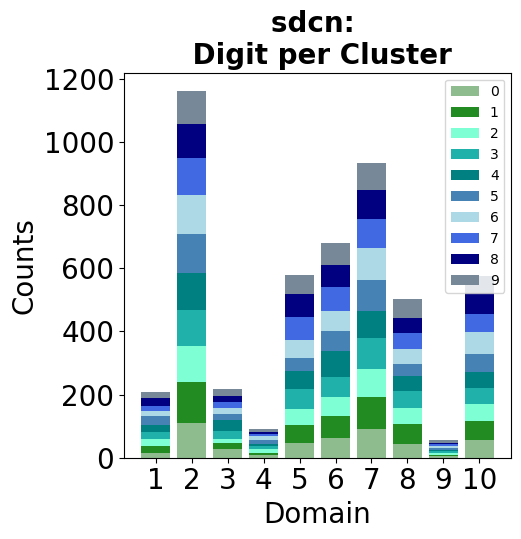

In [56]:
plot_something_per_domain_counts(domain, digit, digits_per_domain, fs =20, title = model_name+': \n Digit per Cluster',) #, legend = ['forest background', 'ocean background'])

In [57]:
digit

array([4, 9, 3, ..., 1, 1, 9])

unique labels [0 1 2 3 4 5 6 7 8 9]  N  10


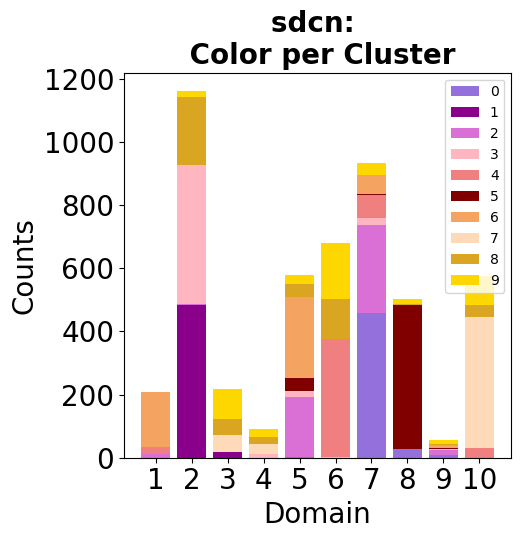

In [58]:
plot_something_per_domain_counts(domain, color, colors_per_domain, fs =20, title = model_name+': \n Color per Cluster', digit_plot=False) 

unique labels [0 1 2 3 4 5 6 7 8 9]
[ 1  2  3  4  5  6  7  8  9 10]


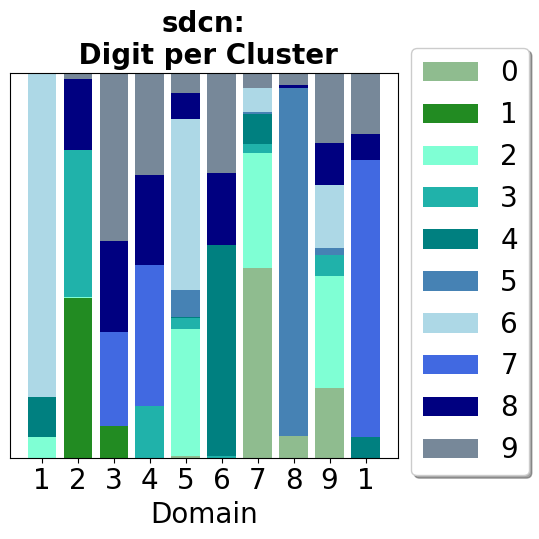

In [59]:
plot_something_per_domain_proportion(domain, color, colors_per_domain, fs =20,title = model_name+':\n Digit per Cluster')